In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [37]:
dft= pd.read_csv('dataset/main/discovergyTesla1min.csv')
dft

,timestamps,mainsP1,mainsP2,mainsP3,evP1,evP2,evP3
0,2021-01-01 01:00,150.612667,105.928667,123.771333,0.0,0.0,0.0
1,2021-01-01 01:01,124.334500,106.094167,156.439667,0.0,0.0,0.0
2,2021-01-01 01:02,124.827167,105.471833,164.194833,0.0,0.0,0.0
3,2021-01-01 01:03,124.642667,107.536667,148.207833,0.0,0.0,0.0
4,2021-01-01 01:04,124.742167,105.153167,151.216833,0.0,0.0,0.0
...,...,...,...,...,...,...,...
525480,2021-12-31 23:00,100.202833,8.790333,210.800667,0.0,0.0,0.0
525481,2021-12-31 23:01,145.110333,9.043667,215.021167,0.0,0.0,0.0
525482,2021-12-31 23:02,170.343333,12.128000,226.868333,0.0,0.0,0.0
525483,2021-12-31 23:03,171.063833,8.790500,212.703167,0.0,0.0,0.0


In [2]:
df= pd.read_csv('dataset/main/discovergyTesla1min.csv')
df.head()

,timestamps,mainsP1,mainsP2,mainsP3,evP1,evP2,evP3
0,2021-01-01 01:00,150.612667,105.928667,123.771333,0.0,0.0,0.0
1,2021-01-01 01:01,124.334500,106.094167,156.439667,0.0,0.0,0.0
2,2021-01-01 01:02,124.827167,105.471833,164.194833,0.0,0.0,0.0
3,2021-01-01 01:03,124.642667,107.536667,148.207833,0.0,0.0,0.0
4,2021-01-01 01:04,124.742167,105.153167,151.216833,0.0,0.0,0.0


In [3]:
df['mains']=df['mainsP1']+df['mainsP2']+df['mainsP3']
df['ev']=df['evP1']+df['evP2']+df['evP3']

In [4]:
df.drop(['mainsP1','mainsP2','mainsP3','evP1','evP2','evP3'],axis=1,inplace=True)

In [5]:
df['main']=df['mains']-df['ev']

<AxesSubplot: >

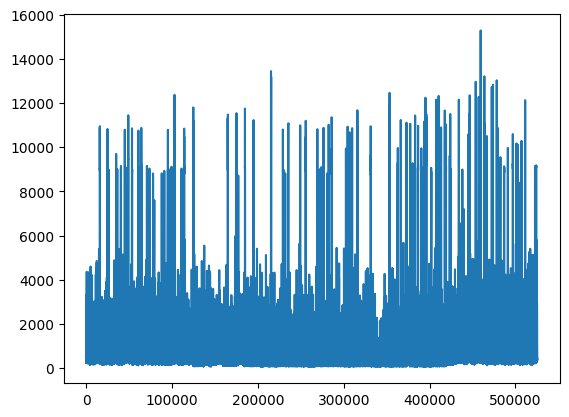

In [6]:
df['mains'].plot()

<AxesSubplot: >

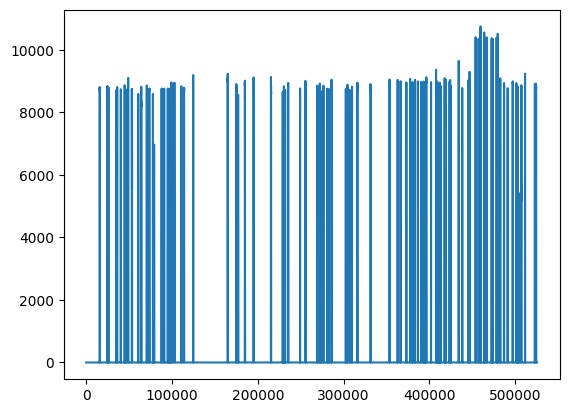

In [7]:
df['ev'].plot()

<AxesSubplot: >

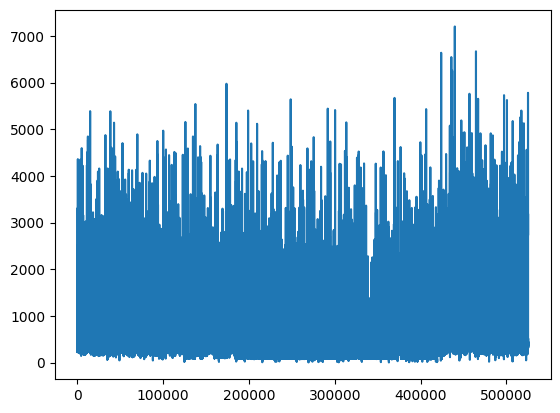

In [8]:
df['main'].plot()

In [9]:
df['timestamps']=pd.to_datetime(df['timestamps'])

In [10]:
df['ev'].replace(0, np.nan, inplace=True)

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df

,timestamps,mains,ev,main
15731,2021-01-11 23:11:00,253.837833,16.9630,236.874833
15732,2021-01-11 23:12:00,301.462667,16.8135,284.649167
15733,2021-01-11 23:13:00,313.159667,17.4690,295.690667
15734,2021-01-11 23:14:00,322.615167,16.9660,305.649167
15735,2021-01-11 23:15:00,2763.438833,2469.6795,293.759333
...,...,...,...,...
524458,2021-12-31 05:58:00,2551.897000,2176.2050,375.692000
524459,2021-12-31 05:59:00,2538.682000,2151.6805,387.001500
524460,2021-12-31 06:00:00,2546.062667,2152.4840,393.578667
524461,2021-12-31 06:01:00,1053.522667,672.4100,381.112667


In [13]:
df = df.reset_index()

In [15]:
df.drop(['index'],axis=1,inplace=True)

In [16]:
df

,timestamps,mains,ev,main
0,2021-01-11 23:11:00,253.837833,16.9630,236.874833
1,2021-01-11 23:12:00,301.462667,16.8135,284.649167
2,2021-01-11 23:13:00,313.159667,17.4690,295.690667
3,2021-01-11 23:14:00,322.615167,16.9660,305.649167
4,2021-01-11 23:15:00,2763.438833,2469.6795,293.759333
...,...,...,...,...
11736,2021-12-31 05:58:00,2551.897000,2176.2050,375.692000
11737,2021-12-31 05:59:00,2538.682000,2151.6805,387.001500
11738,2021-12-31 06:00:00,2546.062667,2152.4840,393.578667
11739,2021-12-31 06:01:00,1053.522667,672.4100,381.112667


In [17]:
df_1 = df[(df['timestamps'] >='2021-01-01 00:00:00') & (df['timestamps'] < '2021-02-01 00:00:00')]

In [18]:
df_1

,timestamps,mains,ev,main
0,2021-01-11 23:11:00,253.837833,16.9630,236.874833
1,2021-01-11 23:12:00,301.462667,16.8135,284.649167
2,2021-01-11 23:13:00,313.159667,17.4690,295.690667
3,2021-01-11 23:14:00,322.615167,16.9660,305.649167
4,2021-01-11 23:15:00,2763.438833,2469.6795,293.759333
...,...,...,...,...
652,2021-01-29 03:12:00,9104.770167,8728.7985,375.971667
653,2021-01-29 03:13:00,9062.117500,8730.6170,331.500500
654,2021-01-29 03:14:00,9050.676667,8722.8635,327.813167
655,2021-01-29 03:15:00,3137.659833,2775.8990,361.760833


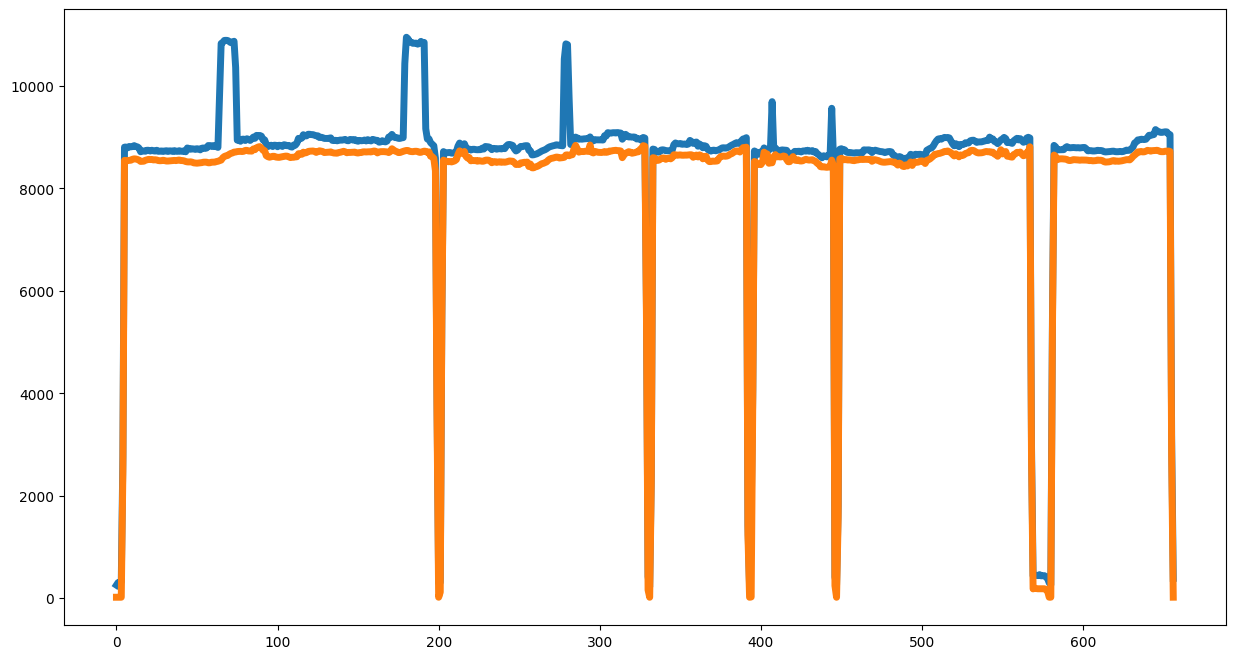

In [19]:
plt.figure(figsize=(15,8))
plt.plot(df_1['mains'],linewidth=5)
plt.plot(df_1['ev'],linewidth=2)
plt.show()

In [21]:
df['Dates'] = pd.to_datetime(df['timestamps']).dt.date

In [34]:
df.drop(['timestamps','mains','ev','main'],axis=1,inplace=True)

In [24]:
dff= pd.read_csv('dataset/main/discovergyTesla1min.csv')
dff.head()

,timestamps,mainsP1,mainsP2,mainsP3,evP1,evP2,evP3
0,2021-01-01 01:00,150.612667,105.928667,123.771333,0.0,0.0,0.0
1,2021-01-01 01:01,124.334500,106.094167,156.439667,0.0,0.0,0.0
2,2021-01-01 01:02,124.827167,105.471833,164.194833,0.0,0.0,0.0
3,2021-01-01 01:03,124.642667,107.536667,148.207833,0.0,0.0,0.0
4,2021-01-01 01:04,124.742167,105.153167,151.216833,0.0,0.0,0.0


In [25]:
dff['mains']=dff['mainsP1']+dff['mainsP2']+dff['mainsP3']
dff['ev']=dff['evP1']+dff['evP2']+dff['evP3']

In [26]:
dff.drop(['mainsP1','mainsP2','mainsP3','evP1','evP2','evP3'],axis=1,inplace=True)

In [27]:
dff['main']=dff['mains']-dff['ev']

In [28]:
dff

,timestamps,mains,ev,main
0,2021-01-01 01:00,380.312667,0.0,380.312667
1,2021-01-01 01:01,386.868333,0.0,386.868333
2,2021-01-01 01:02,394.493833,0.0,394.493833
3,2021-01-01 01:03,380.387167,0.0,380.387167
4,2021-01-01 01:04,381.112167,0.0,381.112167
...,...,...,...,...
525480,2021-12-31 23:00,319.793833,0.0,319.793833
525481,2021-12-31 23:01,369.175167,0.0,369.175167
525482,2021-12-31 23:02,409.339667,0.0,409.339667
525483,2021-12-31 23:03,392.557500,0.0,392.557500


In [29]:
dff['Dates'] = pd.to_datetime(dff['timestamps']).dt.date

In [39]:
date = df['Dates'].unique()

In [48]:
date =np.array(date)

In [51]:
df_t = pd.DataFrame(date,columns=['dates'])

In [52]:
df_t

,dates
0,2021-01-11
1,2021-01-12
2,2021-01-18
3,2021-01-19
4,2021-01-25
...,...
94,2021-12-17
95,2021-12-19
96,2021-12-22
97,2021-12-30


In [54]:
dff

,timestamps,mains,ev,main,Dates
0,2021-01-01 01:00,380.312667,0.0,380.312667,2021-01-01
1,2021-01-01 01:01,386.868333,0.0,386.868333,2021-01-01
2,2021-01-01 01:02,394.493833,0.0,394.493833,2021-01-01
3,2021-01-01 01:03,380.387167,0.0,380.387167,2021-01-01
4,2021-01-01 01:04,381.112167,0.0,381.112167,2021-01-01
...,...,...,...,...,...
525480,2021-12-31 23:00,319.793833,0.0,319.793833,2021-12-31
525481,2021-12-31 23:01,369.175167,0.0,369.175167,2021-12-31
525482,2021-12-31 23:02,409.339667,0.0,409.339667,2021-12-31
525483,2021-12-31 23:03,392.557500,0.0,392.557500,2021-12-31


In [65]:
df_m = pd.merge(dff, df_t, left_on='Dates', right_on='dates', how='left')
df_m

,timestamps,mains,ev,main,Dates,dates
0,2021-01-01 01:00,380.312667,0.0,380.312667,2021-01-01,NaN
1,2021-01-01 01:01,386.868333,0.0,386.868333,2021-01-01,NaN
2,2021-01-01 01:02,394.493833,0.0,394.493833,2021-01-01,NaN
3,2021-01-01 01:03,380.387167,0.0,380.387167,2021-01-01,NaN
4,2021-01-01 01:04,381.112167,0.0,381.112167,2021-01-01,NaN
...,...,...,...,...,...,...
525480,2021-12-31 23:00,319.793833,0.0,319.793833,2021-12-31,2021-12-31
525481,2021-12-31 23:01,369.175167,0.0,369.175167,2021-12-31,2021-12-31
525482,2021-12-31 23:02,409.339667,0.0,409.339667,2021-12-31,2021-12-31
525483,2021-12-31 23:03,392.557500,0.0,392.557500,2021-12-31,2021-12-31


In [66]:
df_m.dropna(axis=0,inplace=True)

In [67]:
df_m = df_m.reset_index()
df_m.drop(['Dates','dates','index'],axis=1,inplace=True)

In [68]:
#df_m.drop('level_0',axis=1,inplace=True)

In [77]:
df_m['timestamps']=pd.to_datetime(df_m['timestamps'])

In [78]:
df_1 = df_m[(df_m['timestamps'] >='2021-01-11 00:00:00') & (df_m['timestamps'] < '2021-01-13 00:00:00')]

In [79]:
df_1

,timestamps,mains,ev,main
0,2021-01-11 00:00:00,289.155833,0.0,289.155833
1,2021-01-11 00:01:00,291.485833,0.0,291.485833
2,2021-01-11 00:02:00,247.856000,0.0,247.856000
3,2021-01-11 00:03:00,239.254000,0.0,239.254000
4,2021-01-11 00:04:00,241.164333,0.0,241.164333
...,...,...,...,...
2875,2021-01-12 23:55:00,257.100667,0.0,257.100667
2876,2021-01-12 23:56:00,257.292667,0.0,257.292667
2877,2021-01-12 23:57:00,256.134167,0.0,256.134167
2878,2021-01-12 23:58:00,256.158667,0.0,256.158667


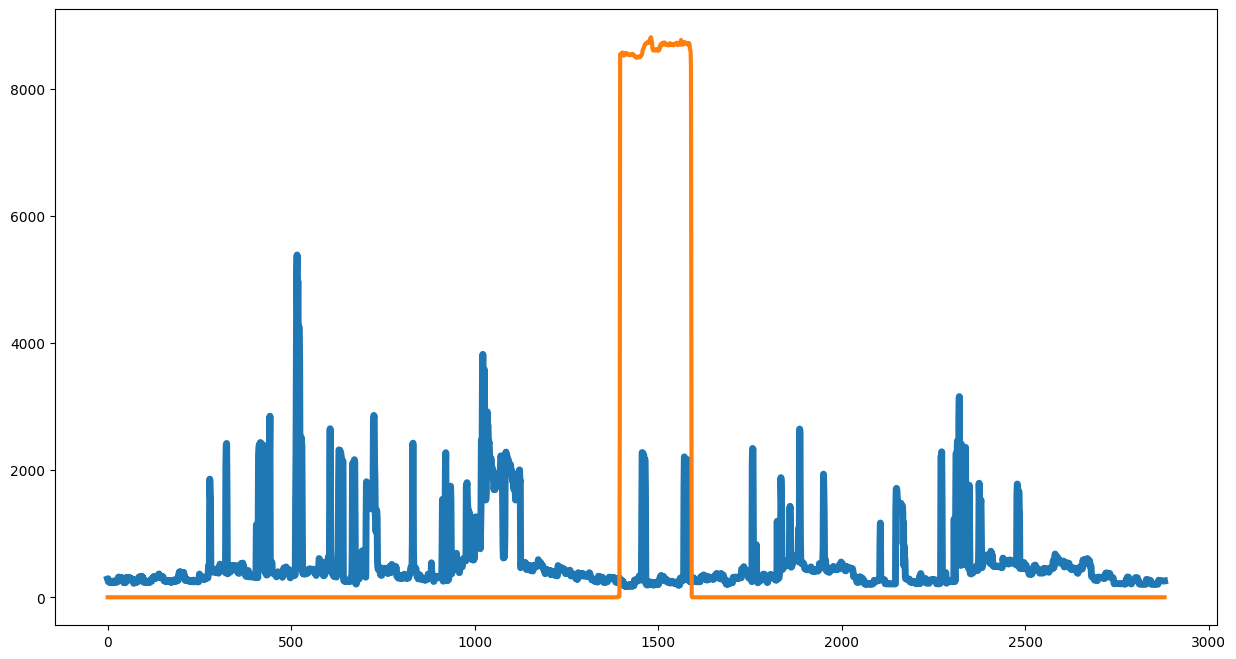

In [94]:
plt.figure(figsize=(15,8))
plt.plot(df_1['main'],linewidth=5)
plt.plot(df_1['ev'],linewidth=3)
plt.show()

<AxesSubplot: >

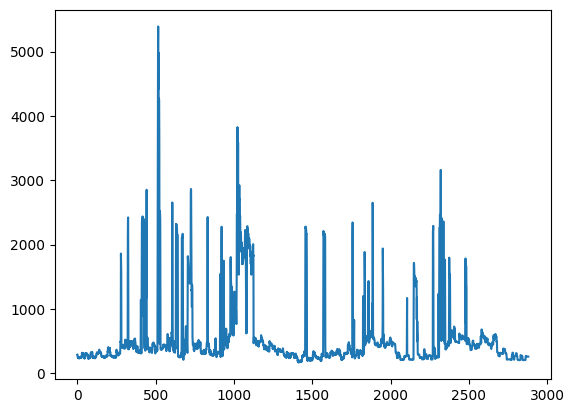

In [81]:
df_1['main'].plot()

In [86]:
df_m

,timestamps,mains,ev,main
0,2021-01-11 00:00:00,289.155833,0.0,289.155833
1,2021-01-11 00:01:00,291.485833,0.0,291.485833
2,2021-01-11 00:02:00,247.856000,0.0,247.856000
3,2021-01-11 00:03:00,239.254000,0.0,239.254000
4,2021-01-11 00:04:00,241.164333,0.0,241.164333
...,...,...,...,...
142500,2021-12-31 23:00:00,319.793833,0.0,319.793833
142501,2021-12-31 23:01:00,369.175167,0.0,369.175167
142502,2021-12-31 23:02:00,409.339667,0.0,409.339667
142503,2021-12-31 23:03:00,392.557500,0.0,392.557500


In [87]:
df_m['Day']=pd.to_datetime(df_m['timestamps']).dt.dayofweek
df_m['Hour']=pd.to_datetime(df_m['timestamps']).dt.hour
df_m['Minute']=pd.to_datetime(df_m['timestamps']).dt.minute

In [89]:
df_m.drop('timestamps',axis=1,inplace=True)

In [92]:
df_m.drop('mains',axis=1,inplace=True)

In [93]:
df_m

,ev,main,Day,Hour,Minute
0,0.0,289.155833,0,0,0
1,0.0,291.485833,0,0,1
2,0.0,247.856000,0,0,2
3,0.0,239.254000,0,0,3
4,0.0,241.164333,0,0,4
...,...,...,...,...,...
142500,0.0,319.793833,4,23,0
142501,0.0,369.175167,4,23,1
142502,0.0,409.339667,4,23,2
142503,0.0,392.557500,4,23,3


In [96]:
df_m['main']=pd.to_numeric(df_m['main'], errors='coerce')

In [97]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df_m)
df_scaled = pd.DataFrame(df_1,columns=df_m.columns)
df_scaled

,ev,main,Day,Hour,Minute
0,0.0,0.042974,0.000000,0.0,0.000000
1,0.0,0.043324,0.000000,0.0,0.016949
2,0.0,0.036781,0.000000,0.0,0.033898
3,0.0,0.035491,0.000000,0.0,0.050847
4,0.0,0.035778,0.000000,0.0,0.067797
...,...,...,...,...,...
142500,0.0,0.047569,0.666667,1.0,0.000000
142501,0.0,0.054973,0.666667,1.0,0.016949
142502,0.0,0.060996,0.666667,1.0,0.033898
142503,0.0,0.058480,0.666667,1.0,0.050847


In [98]:
training_size=int(len(df_scaled)*0.90)
test_size=len(df_scaled)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:5],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df_scaled),1:5],df_scaled.iloc[training_size:len(df_scaled),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(128254, 4) (128254,) (14251, 4) (14251,)


In [99]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [102]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(1,4)))
model1.add(LSTM(50))
#model1.dropout(0.5)
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 50)             11000     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


In [103]:
model_history=model1.fit(X_train, y_train, batch_size = 128,epochs = 50, validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
1002/1002 [==============================] - 11s 6ms/step - loss: 0.0441 - val_loss: 0.0390
Epoch 2/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0436 - val_loss: 0.0393
Epoch 3/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0428 - val_loss: 0.0402
Epoch 4/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0419 - val_loss: 0.0399
Epoch 5/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0412 - val_loss: 0.0394
Epoch 6/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0381 - val_loss: 0.0356
Epoch 7/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0360 - val_loss: 0.0342
Epoch 8/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0355 - val_loss: 0.0362
Epoch 9/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.0353 - val_loss: 0.0381
Epoch 10/50
1002/1002 [==============================] - 5s 5ms/step - loss: 0.03

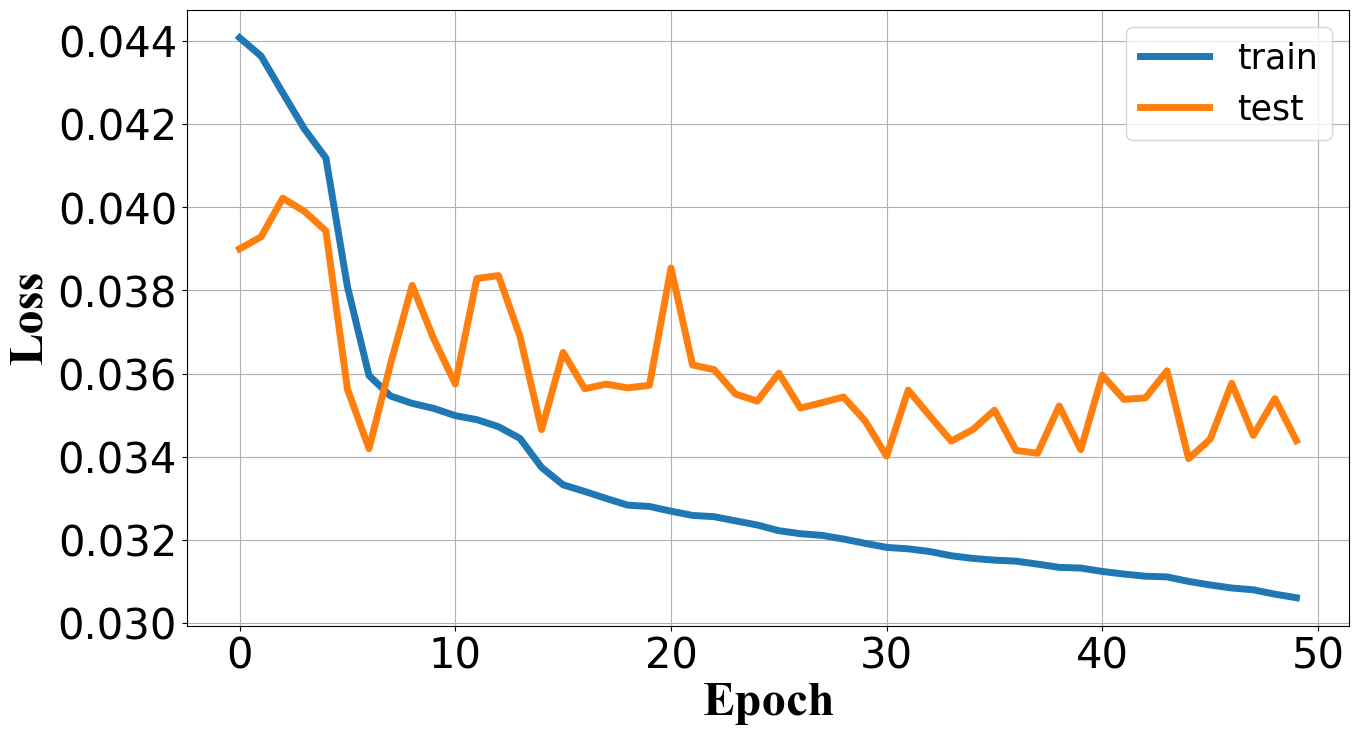

In [104]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['loss'],linewidth=5)
plt.plot(model_history.history['val_loss'],linewidth=5)
#plt.title('Model loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.ylabel('Loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.xlabel('Epoch',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.legend(['train', 'test'], loc='upper right',fontsize=25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
#plt.savefig('H_Model.png')
#plt.savefig('H_Model.pdf')
plt.show()

In [105]:
size = df_scaled.shape[1]

In [106]:
X_test.shape

(14251, 1, 4)

In [107]:
yhat = model1.predict(X_test)

446/446 [==============================] - 2s 2ms/step


In [108]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.185


In [109]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [110]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(14251,)

In [111]:
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(14251,)

In [112]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1994.026


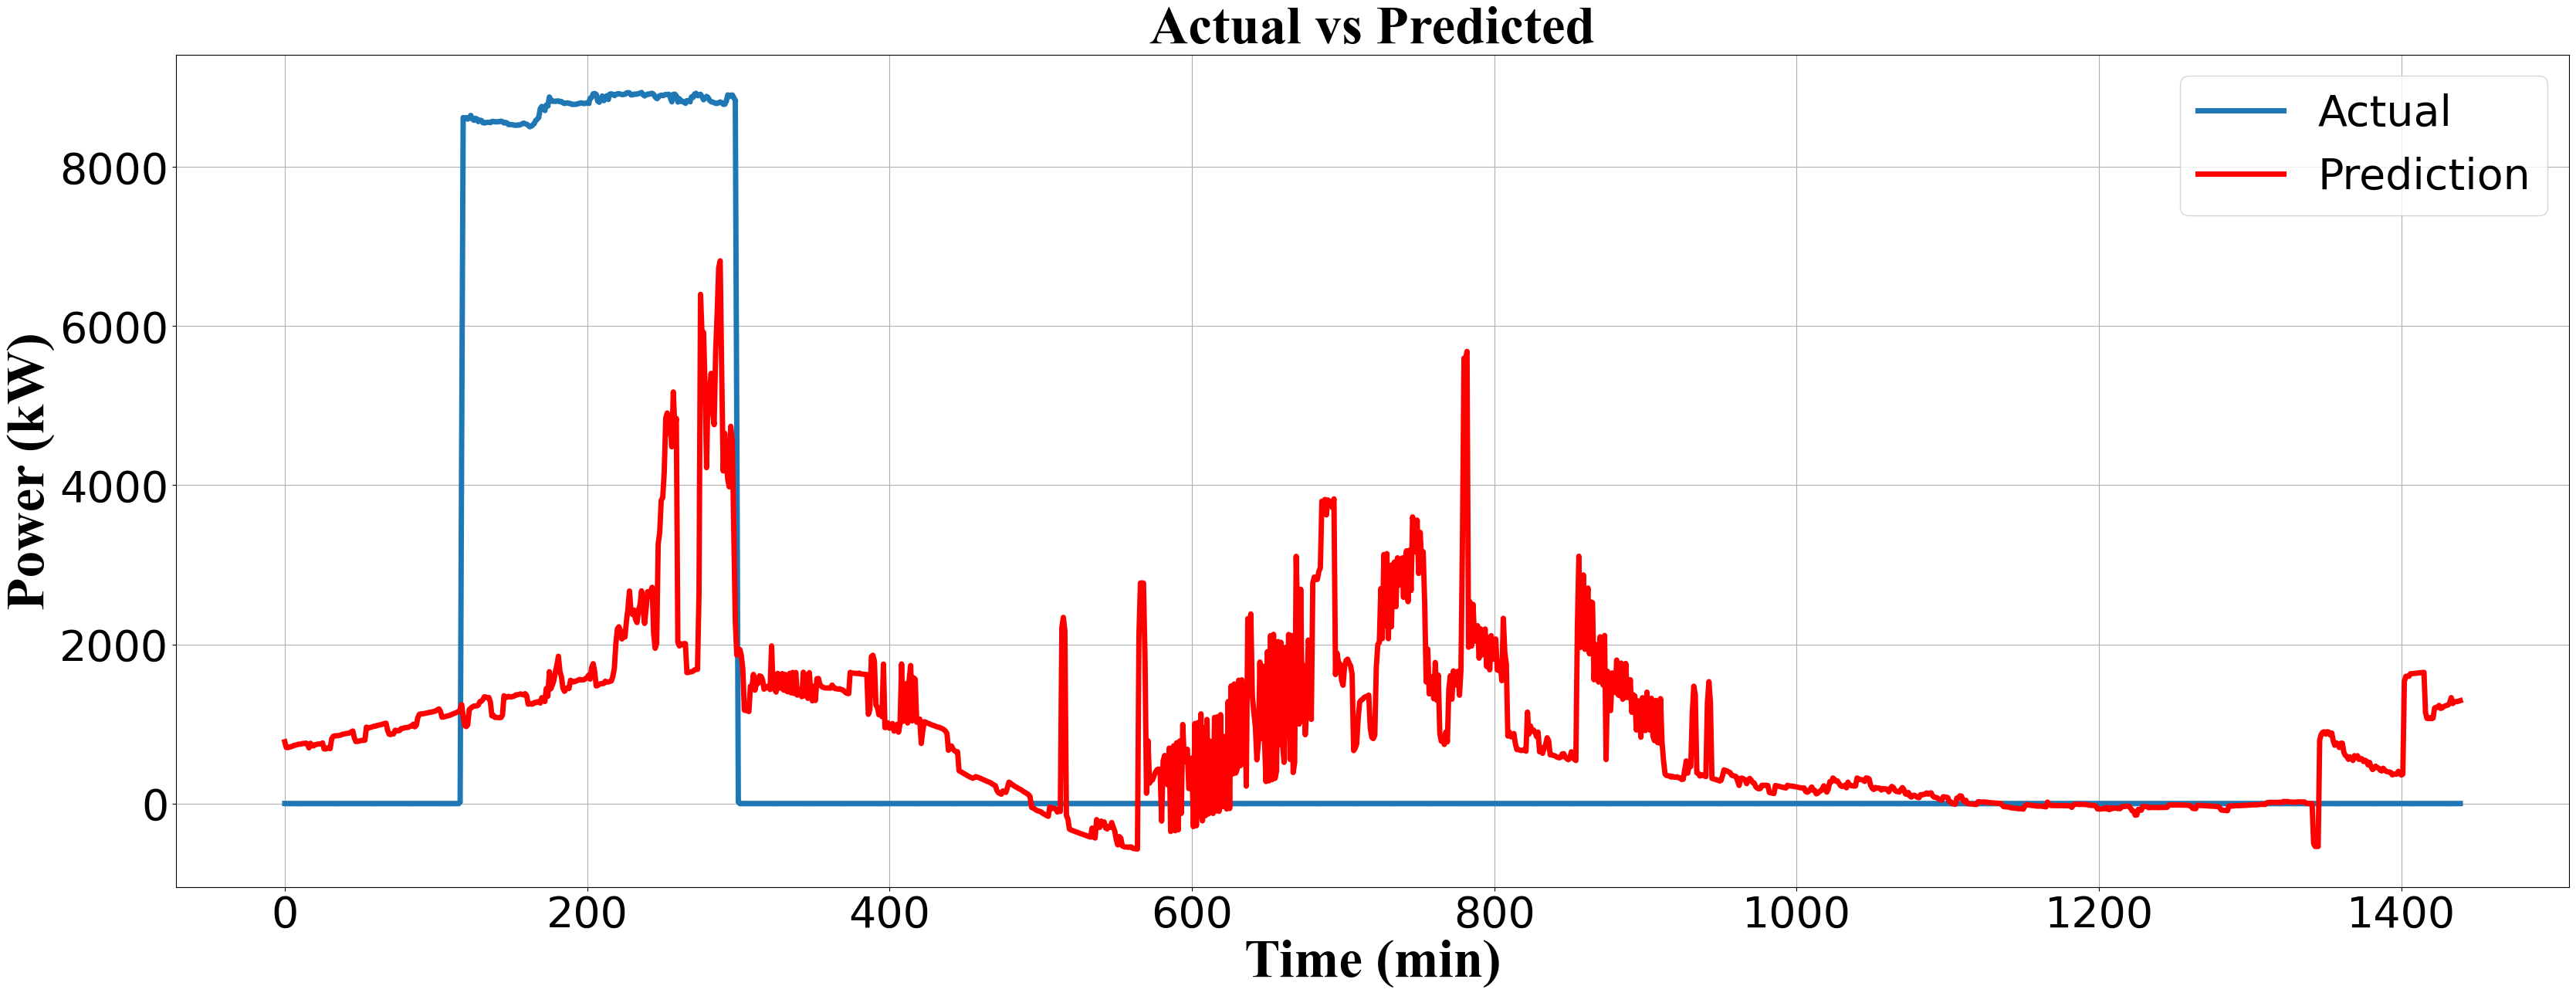

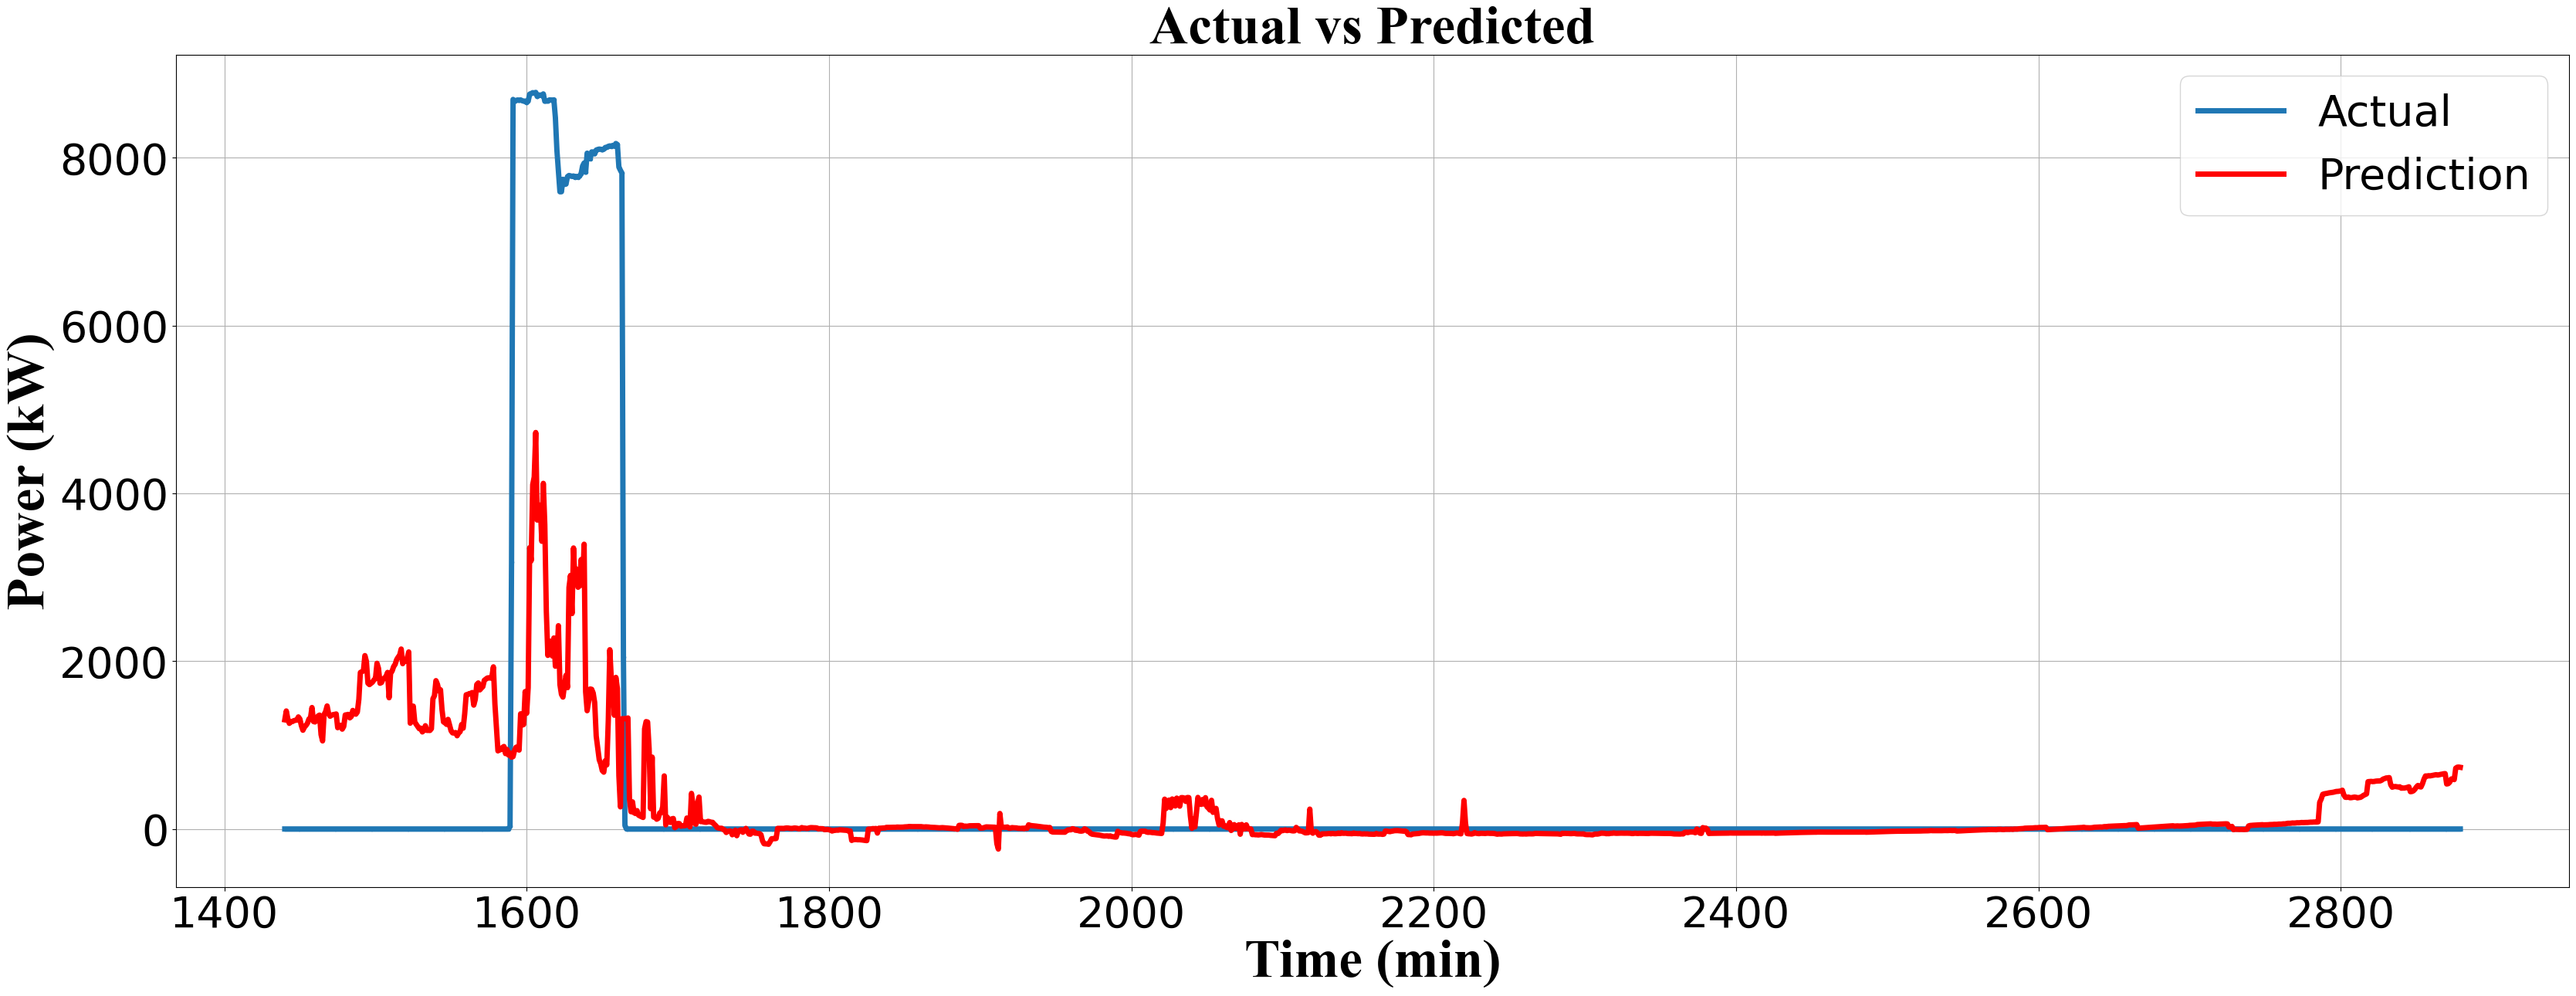

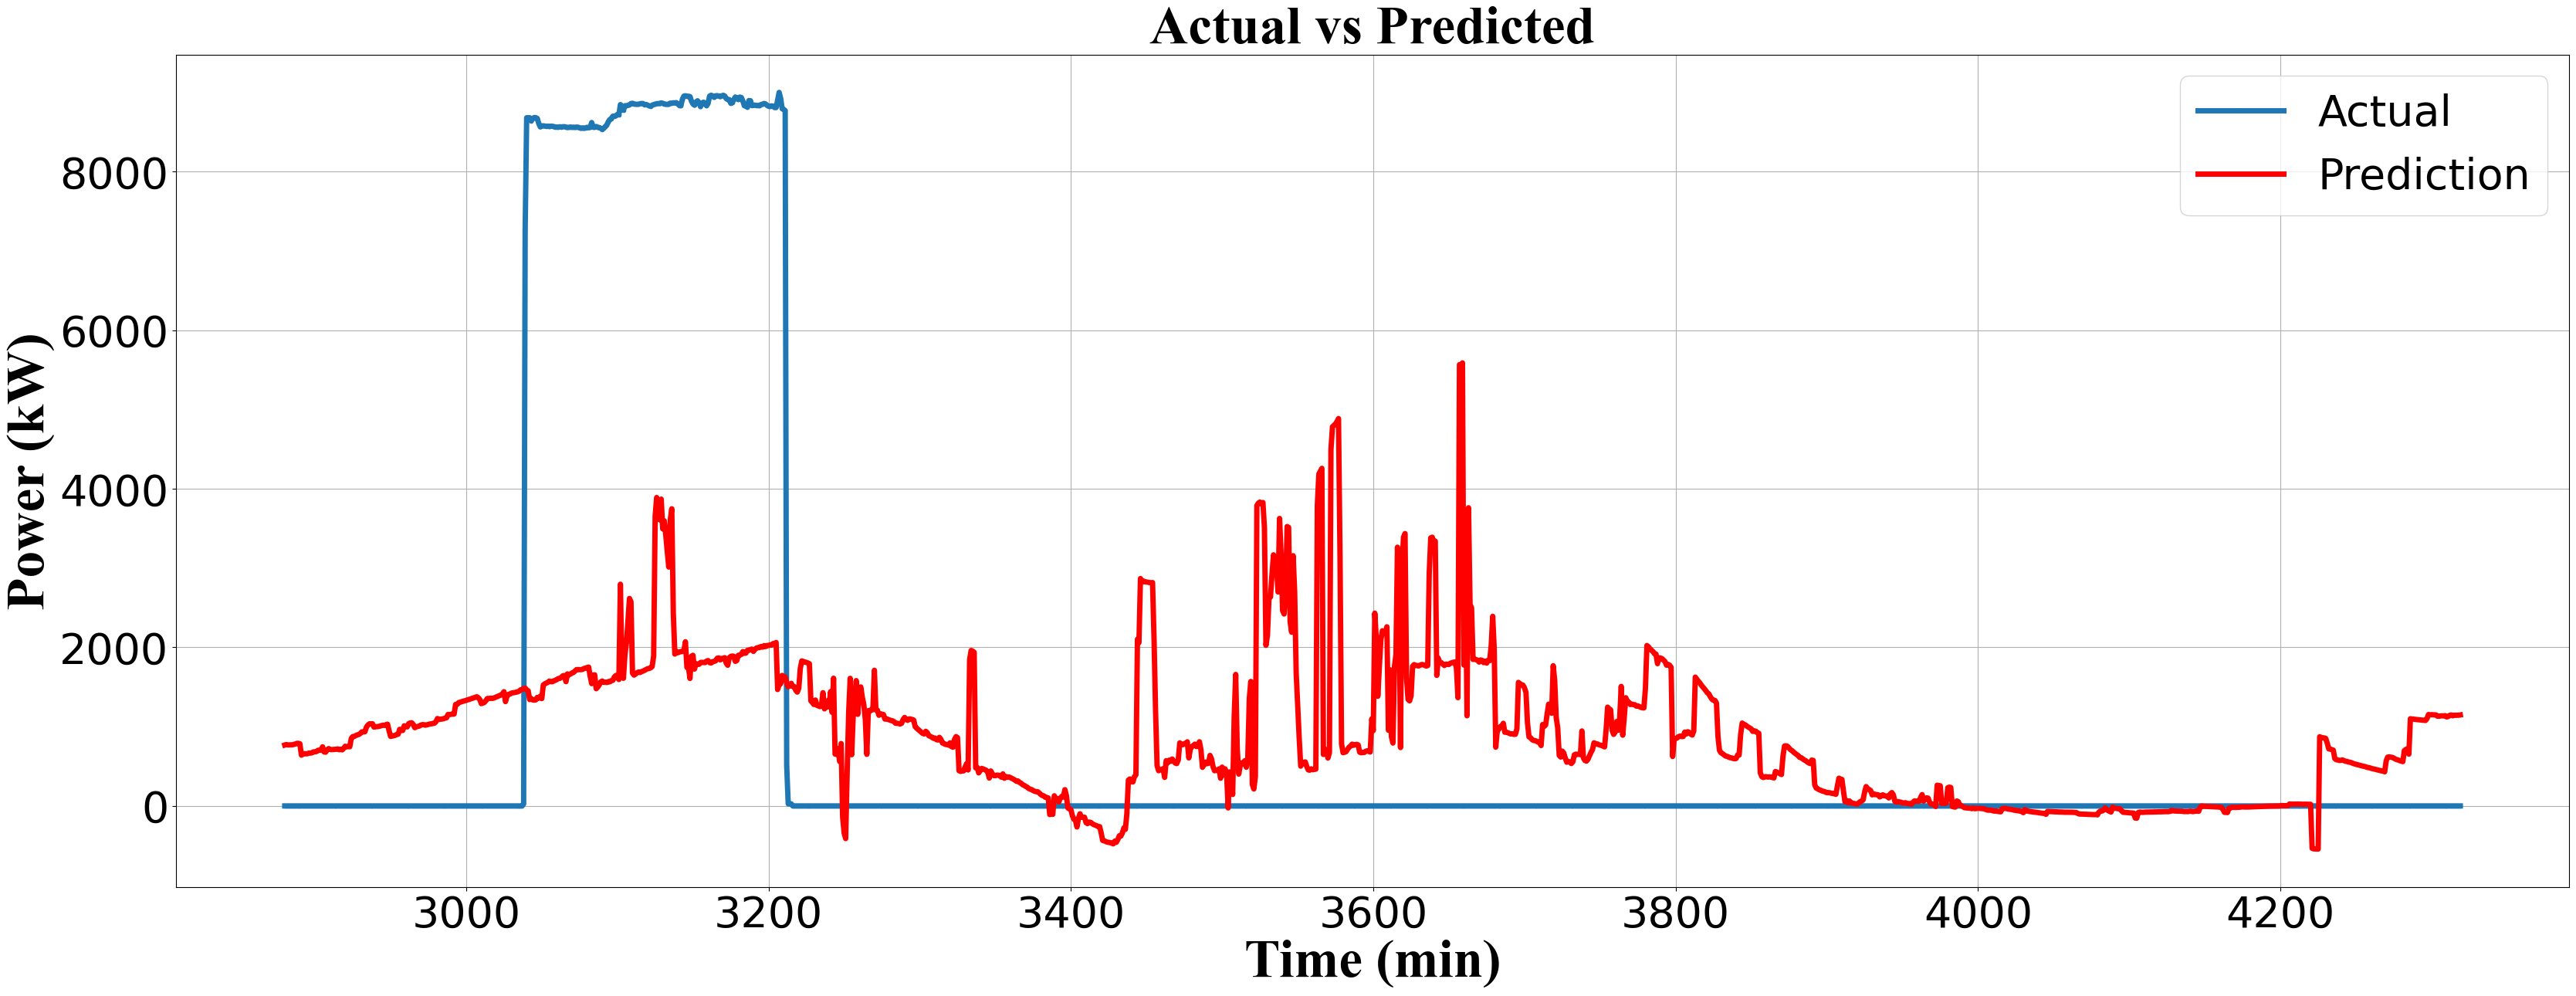

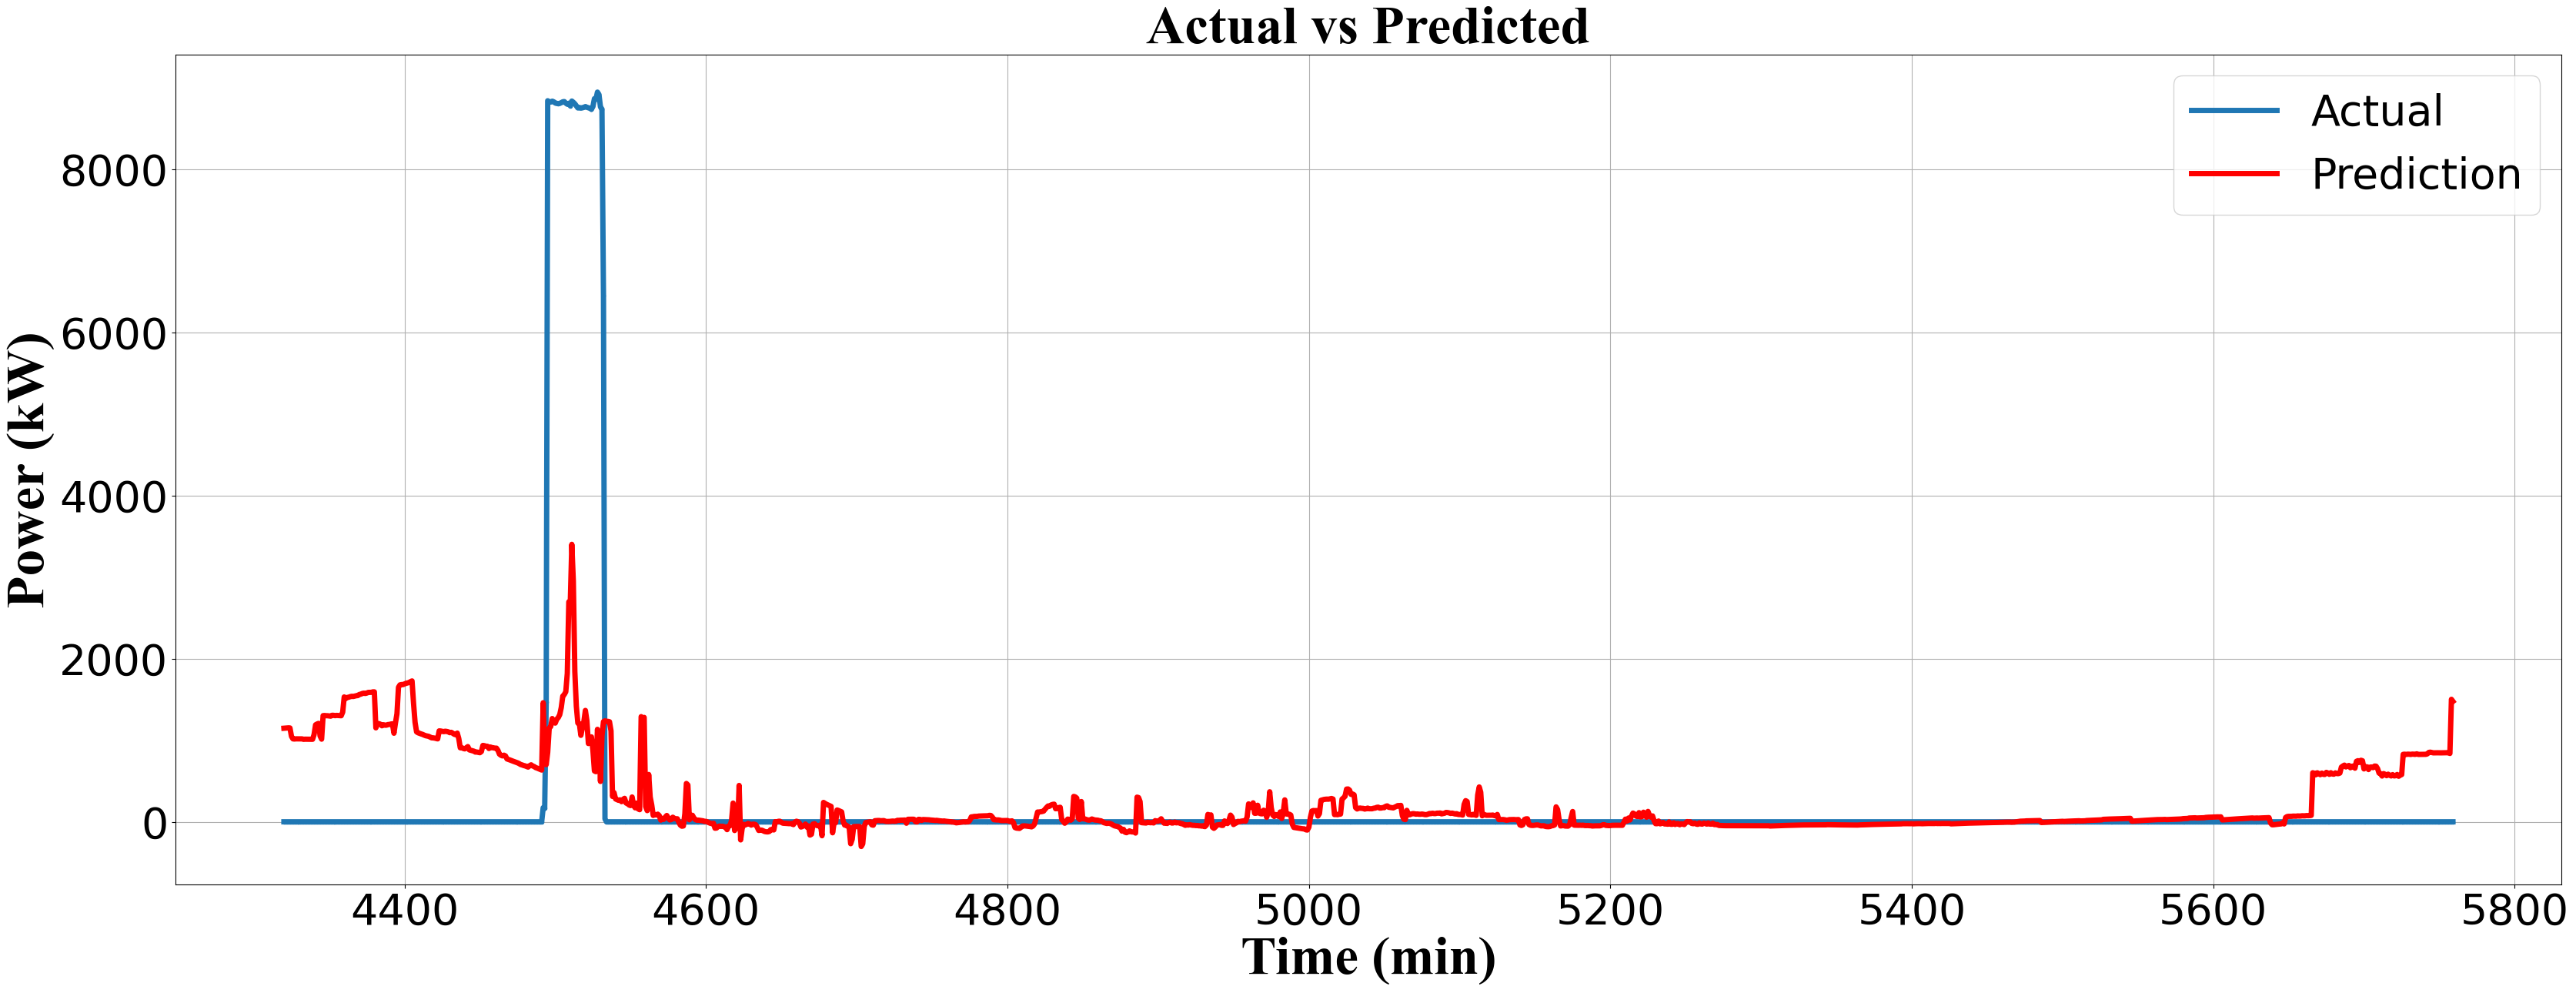

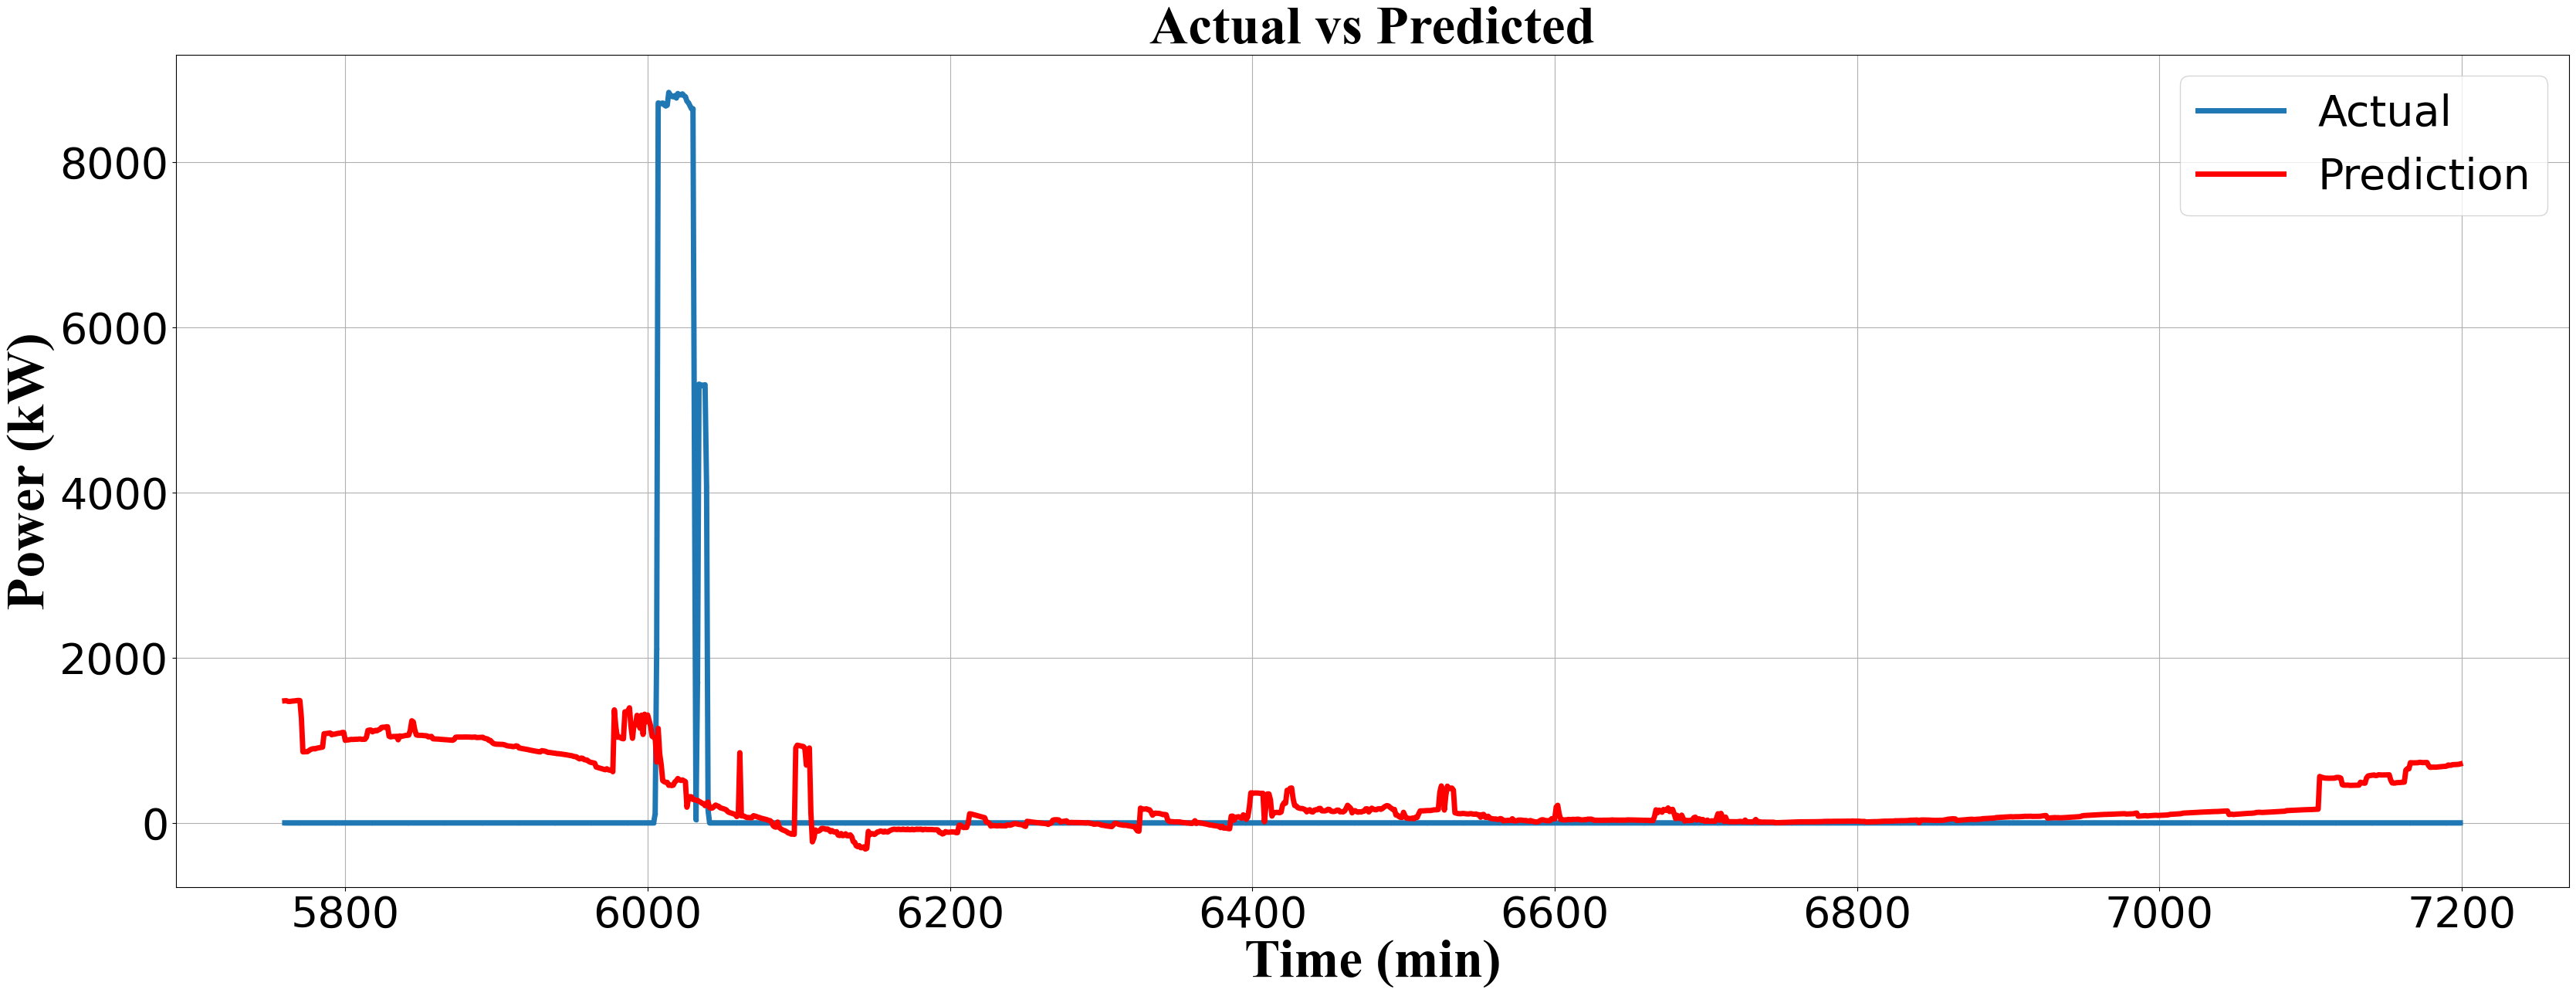

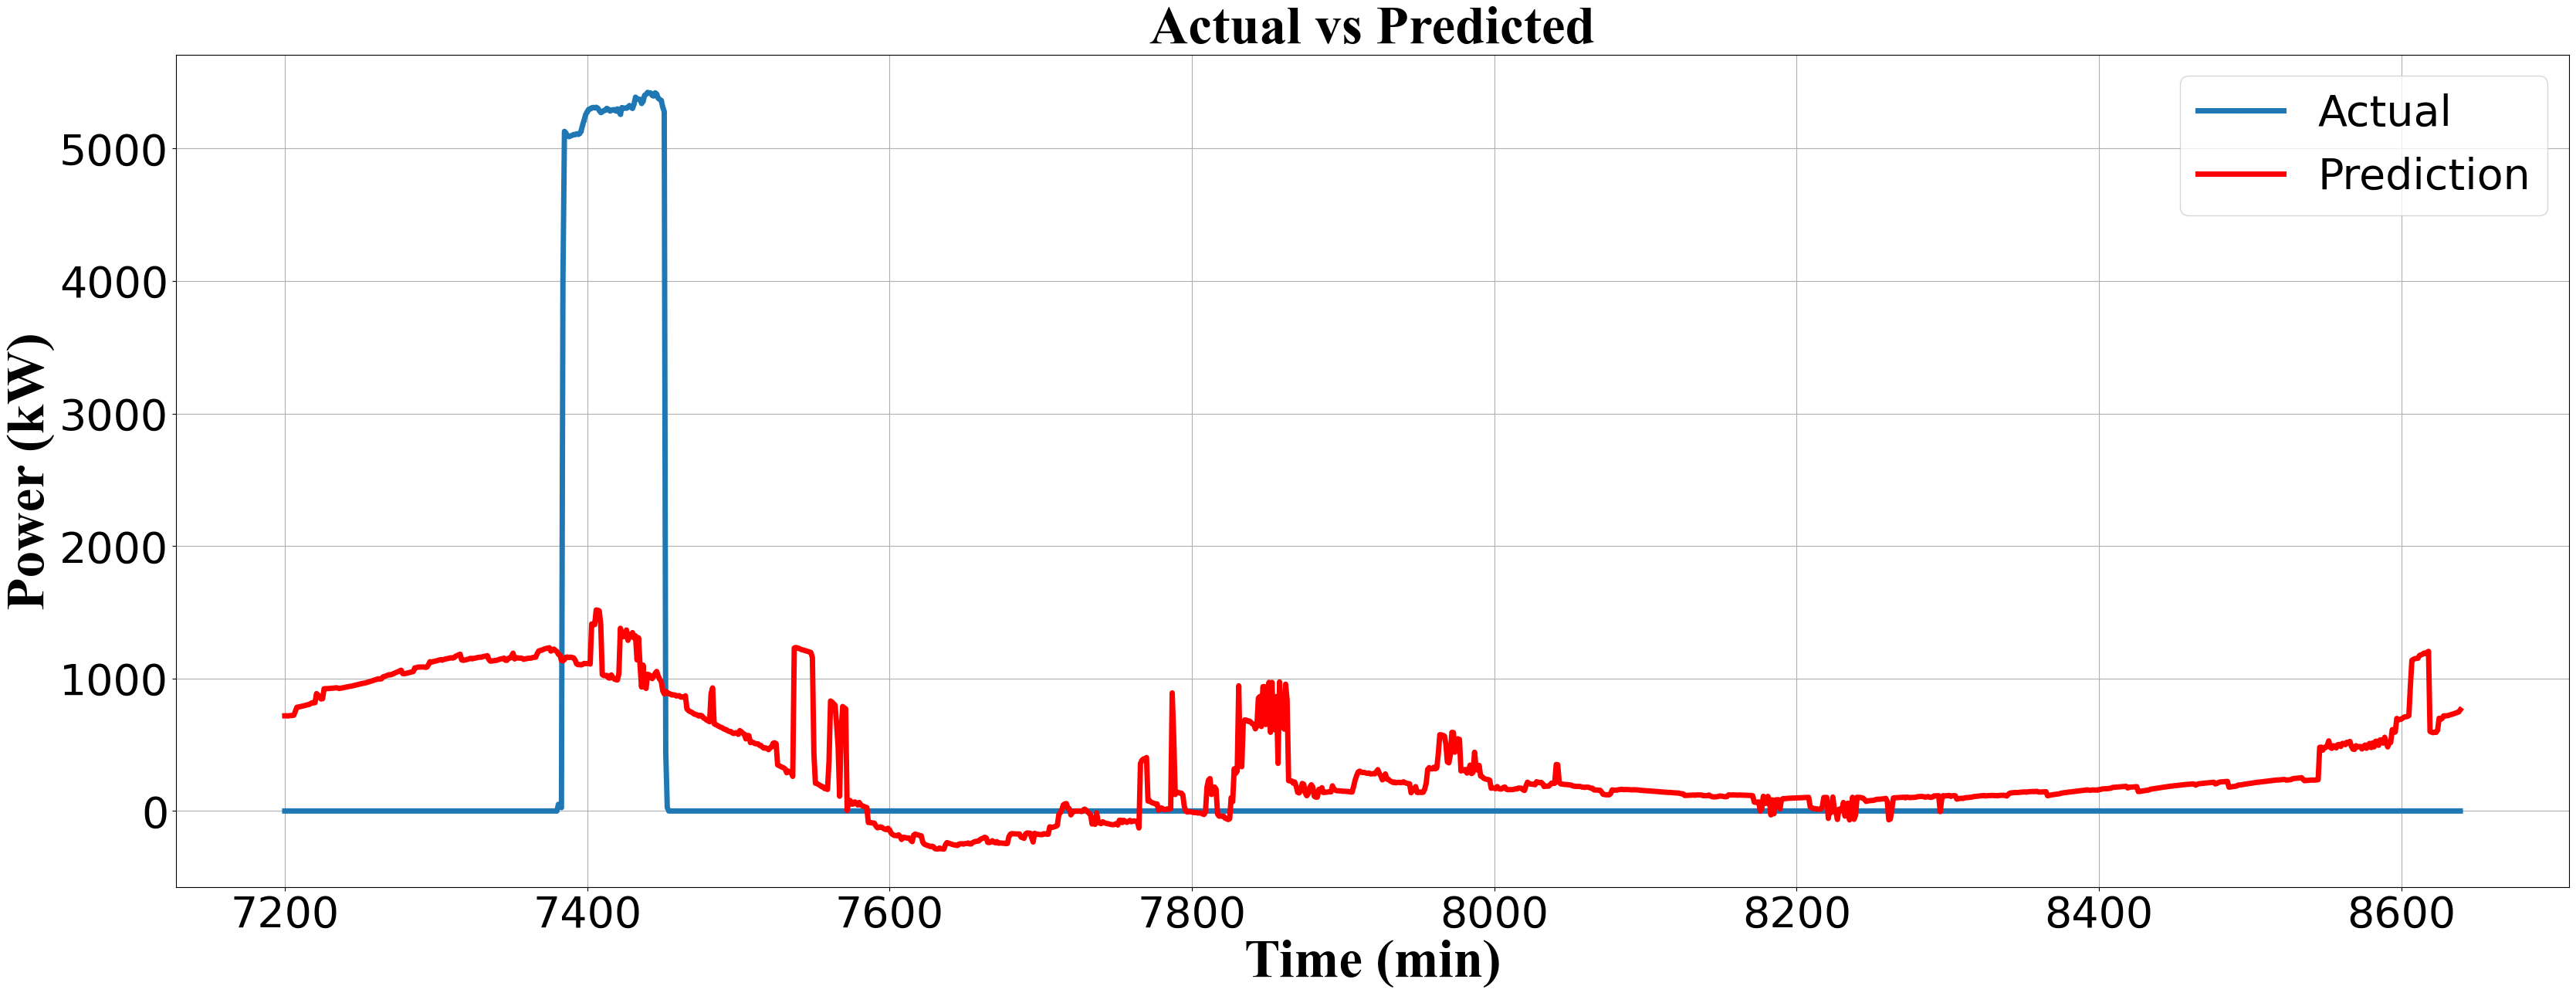

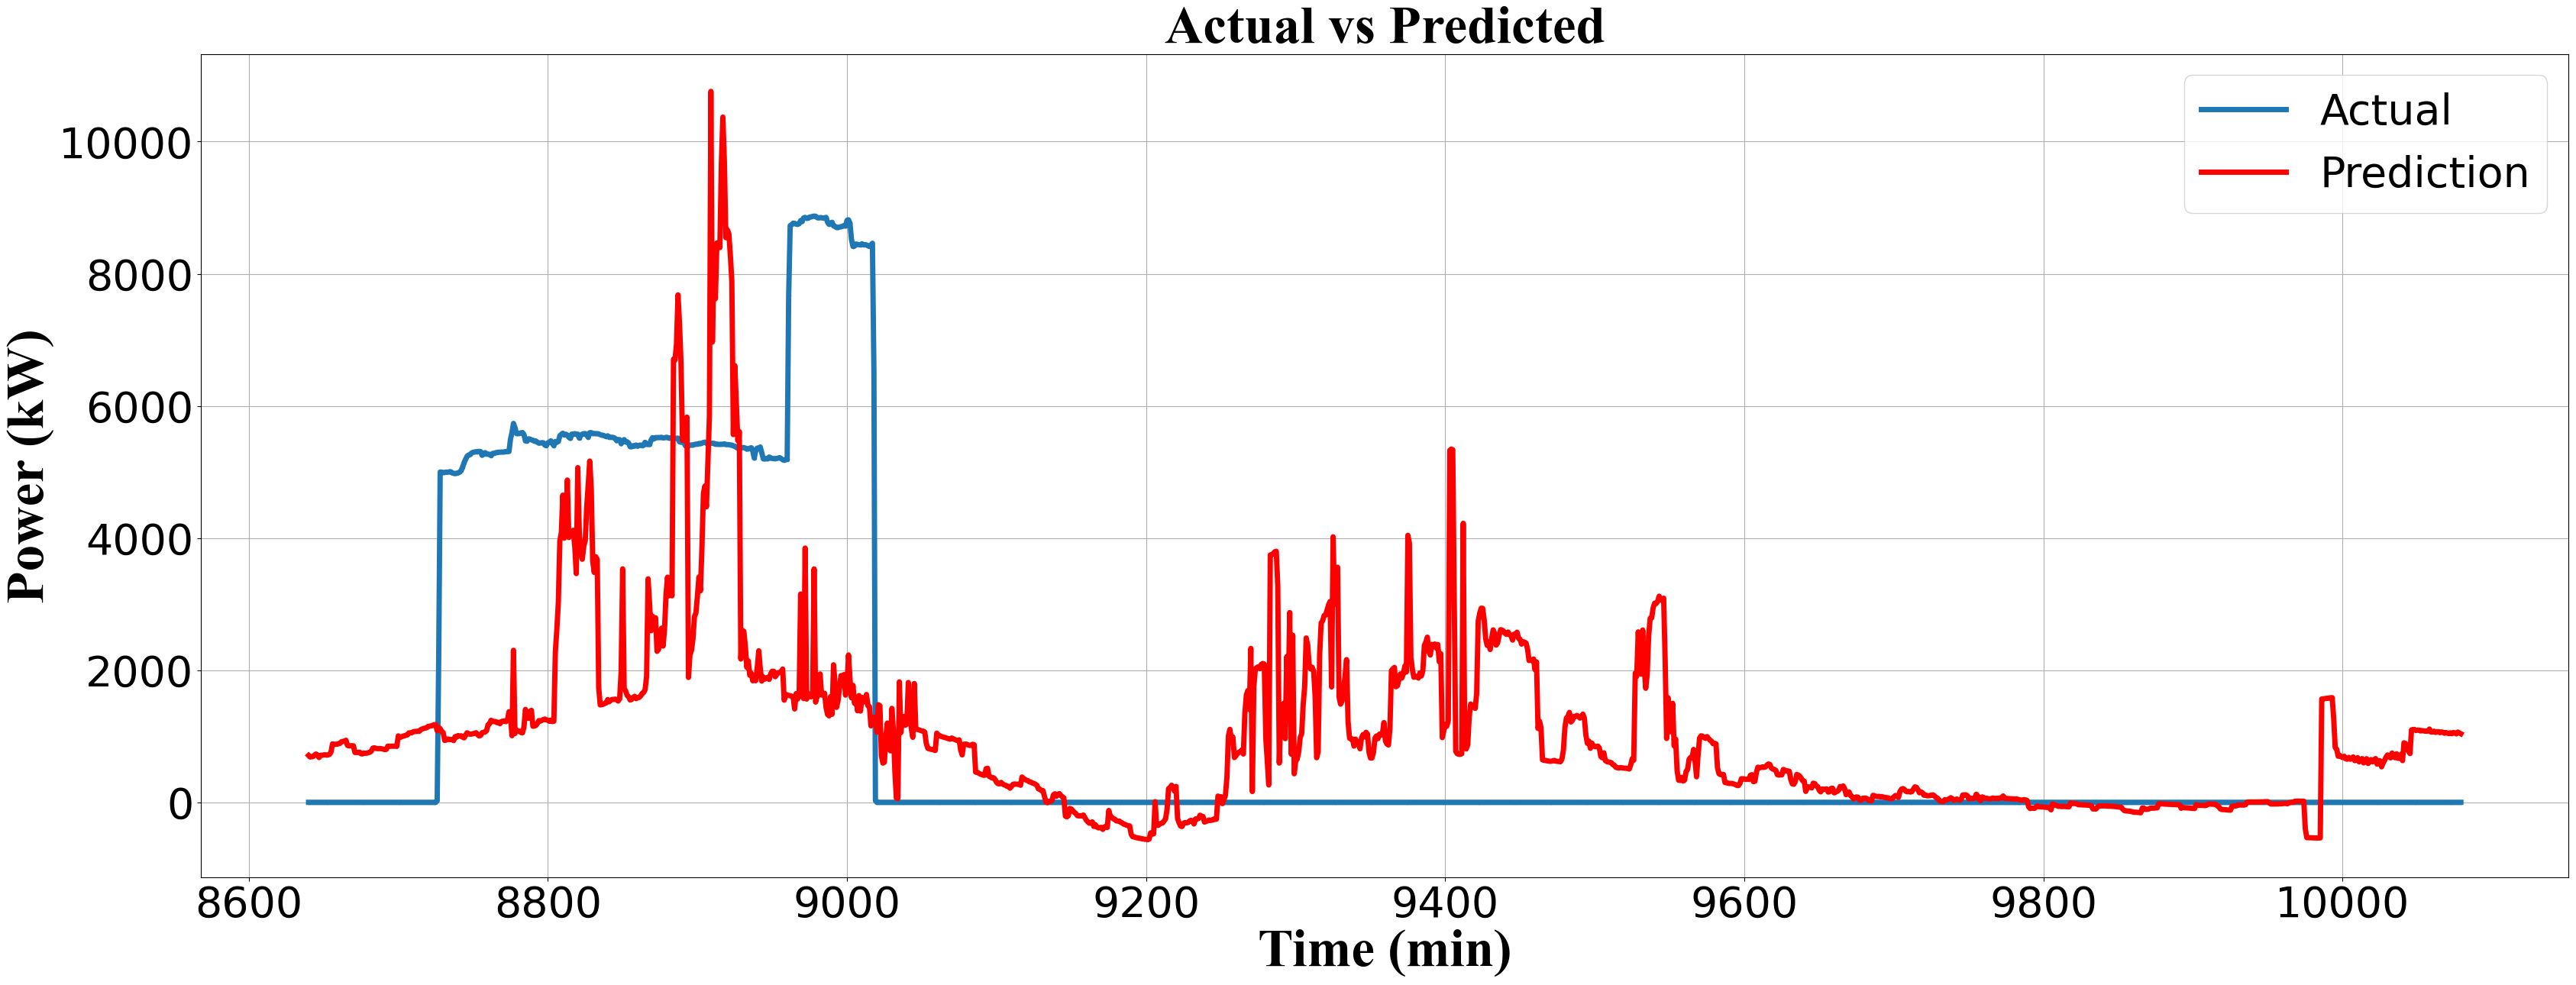

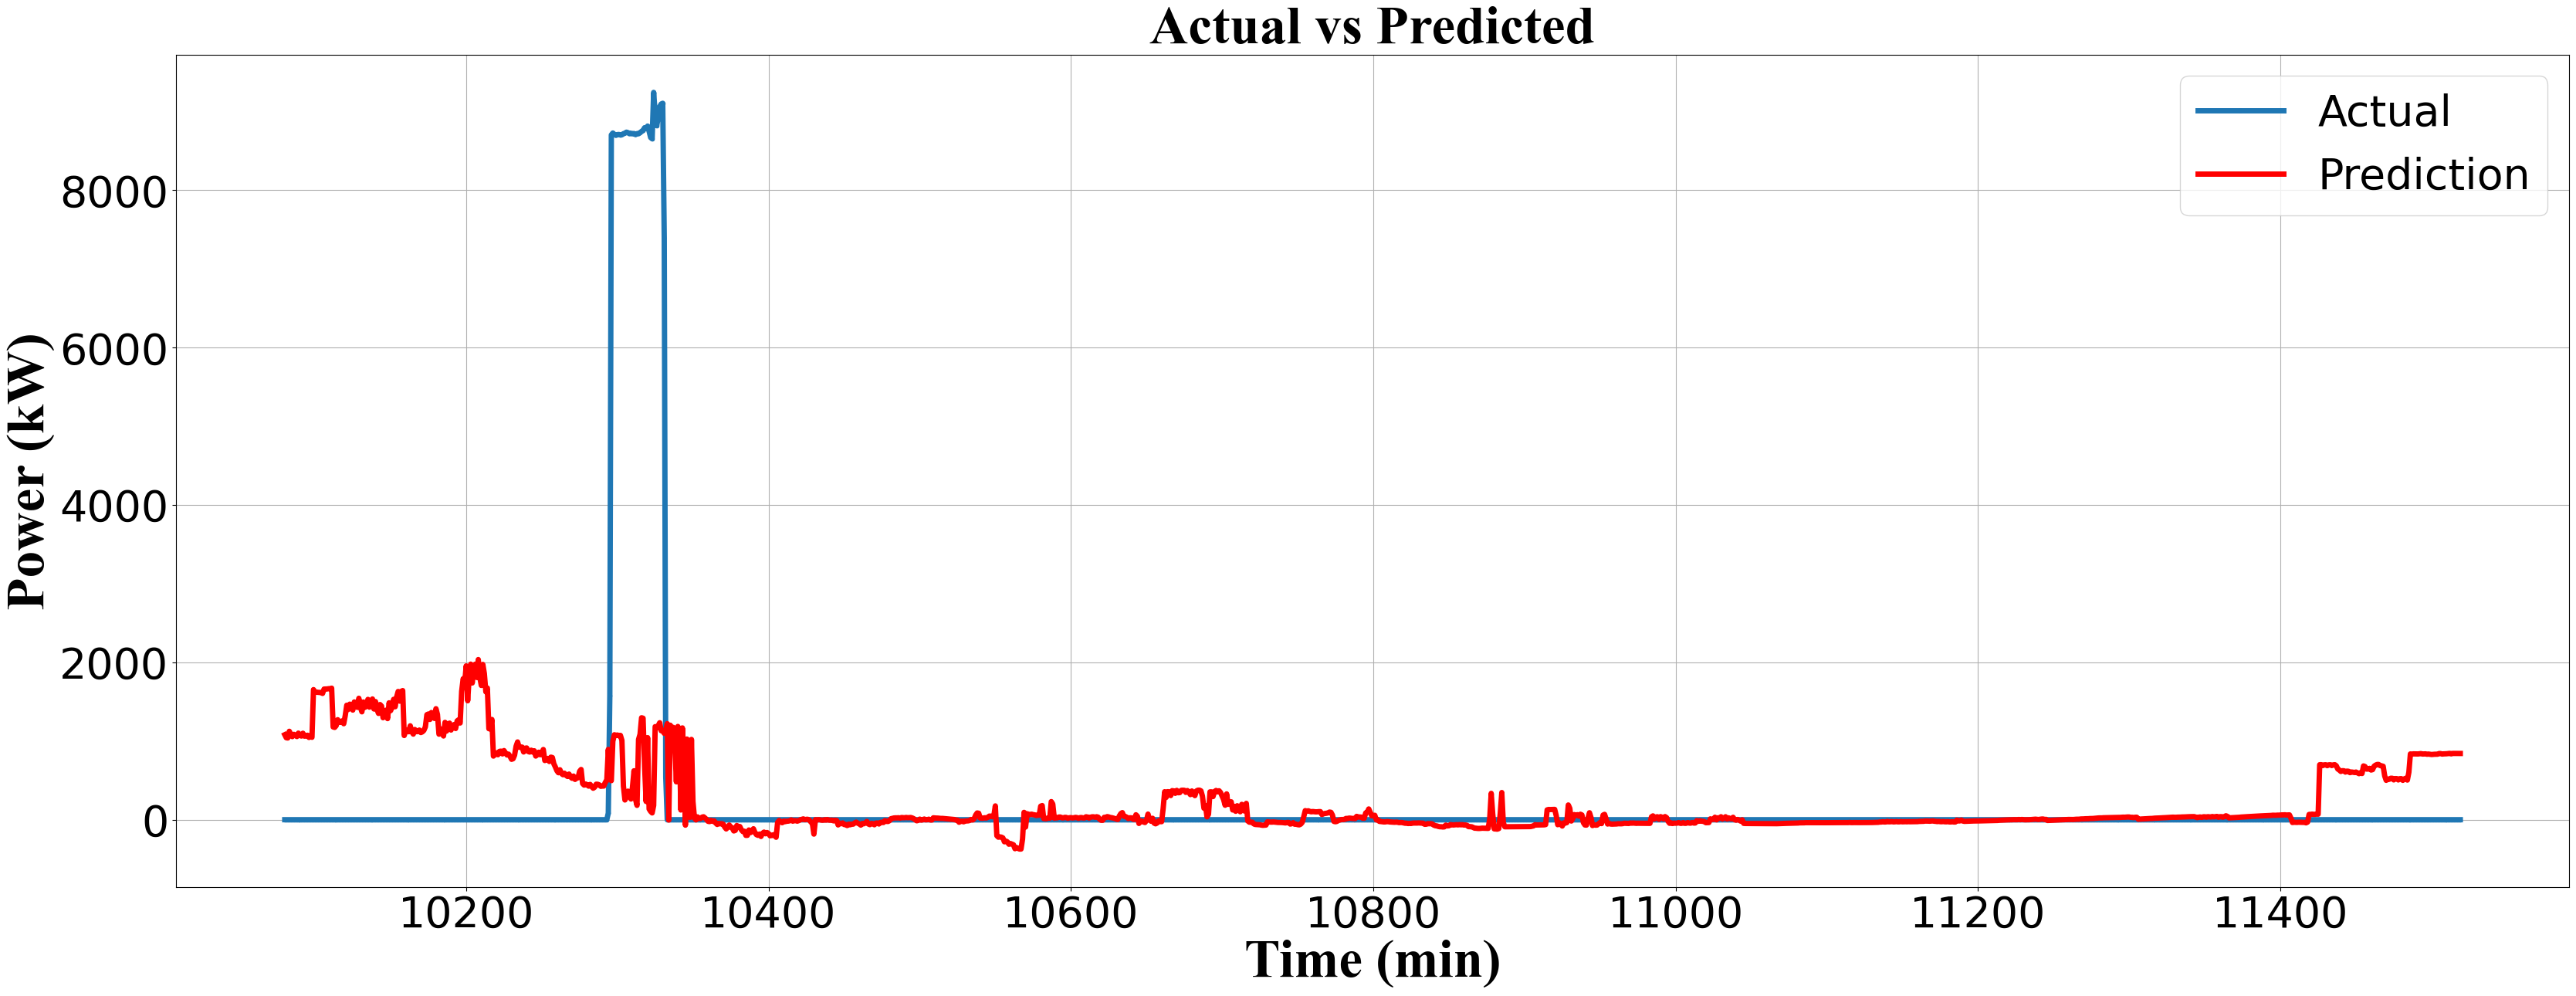

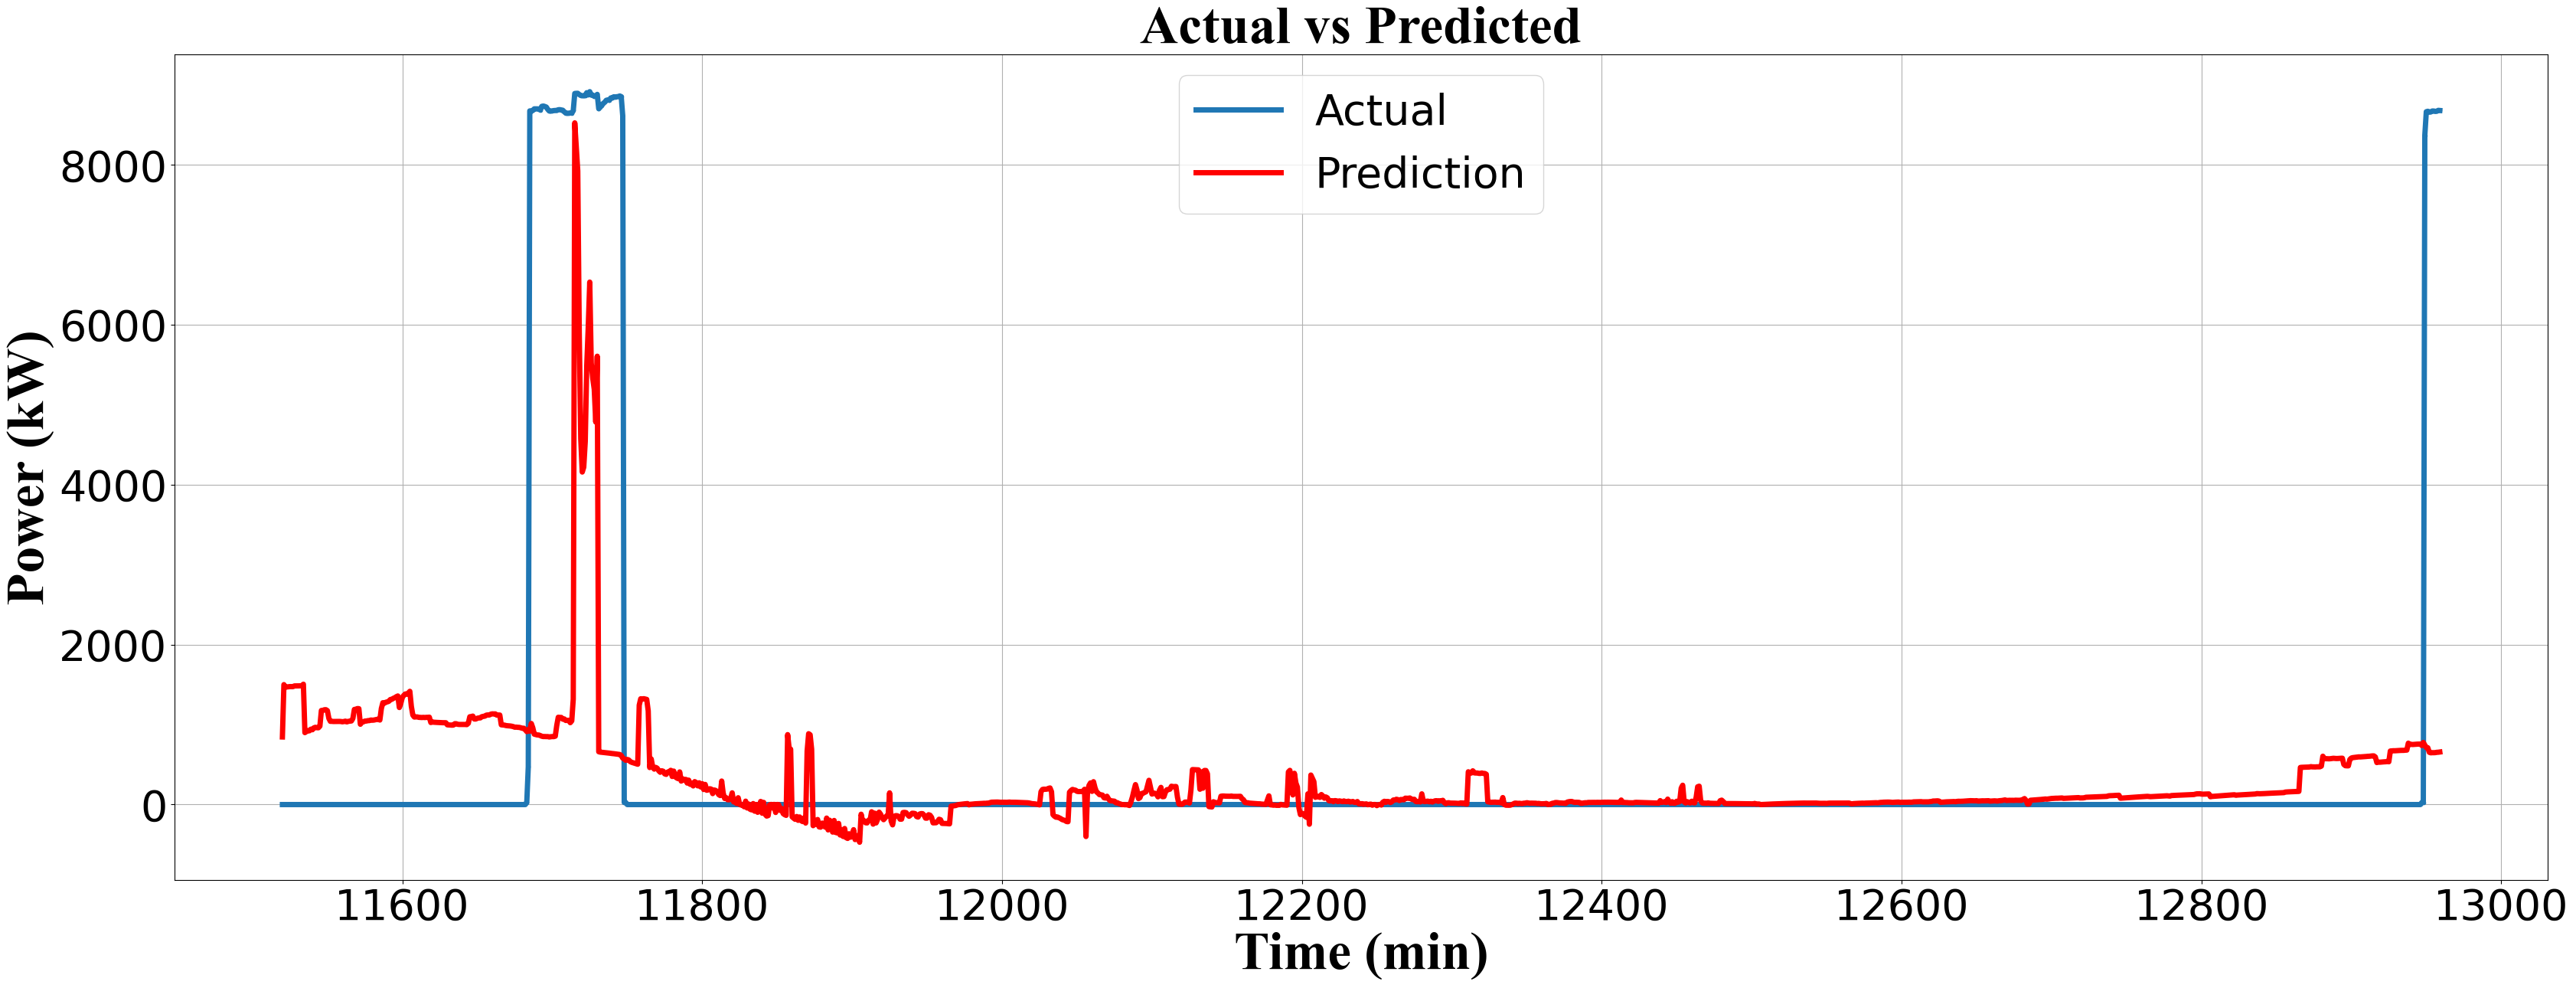

In [113]:
y=0
for i in range(1440,14251,1440):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(40,14)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="Actual",linewidth=5 )
    plt.plot(aa, inv_yhat[y:i], 'r', label="Prediction",linewidth=5)
    y = i
    plt.title('Actual vs Predicted', size=50,fontname="Times New Roman",fontweight="bold")
    plt.ylabel('Power (kW)', size=50,fontname="Times New Roman",fontweight="bold")
    plt.xlabel('Time (min)', size=50,fontname="Times New Roman",fontweight="bold")
    plt.legend(fontsize=40)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.grid()
  #  plt.savefig('H_pred.pdf')
  #  plt.savefig('H_pred.png')
    plt.show()